In [82]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np

In [83]:
with MPRester("QhH6n7UMD6eoOToxuLav") as m:
    #structure for materials
    structure = m.get_phonon_bandstructure_by_material_id("mp-31451")
    

# Détermination de la vitesse du son dans le ZrCoBi

In [84]:
phonon_plot = PhononBSPlotter(structure) #création du graphe

## 1) Graphes des courbes de dispersion et de la zone de Brillouin

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

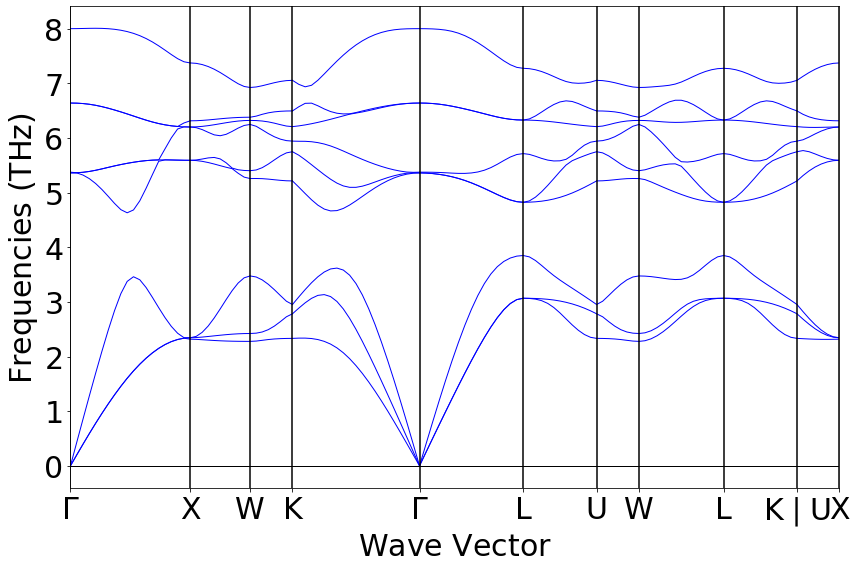

In [85]:
phonon_plot.get_plot() #plot courbe de dispersion

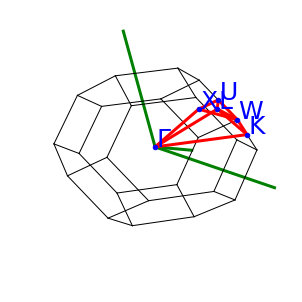

In [86]:
phonon_plot.plot_brillouin() #plot zone de brillouin

## 2) Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

In [87]:
data = phonon_plot.bs_plot_data() #récupération des données nécessaires
distances = data.get("distances")
frequencies = data.get("frequency")

In [88]:
#récupération de 3 courbes différentes dans 3 directions de la zone de brillouin différentes
courbe1 = frequencies[3][0]
courbe2 = frequencies[4][1]
courbe3 = frequencies[5][2]

Soit $\omega$ est la relation de dispersion dans notre matériau, la vitesse du son peut être calculer en prenant la dérivée de la relation de dispersion par rapport au vecteur d'onde $q$ : $\frac{\partial \omega}{\partial q}$ en considérant que nous somme dans le cas des grandes longeurs d'onde : $\lambda >> a$ avec $a$ = paramètre de maille.

In [89]:
#calcul des différentes pentes
def dfdq1(frequence,q):
    pente = np.abs((frequence[-1] - frequence[-2])*10**12)/((q[-1]-q[-2])*10**10)
    return pente
def dfdq2(frequence,q):
    pente = np.abs((frequence[1]-frequence[0])*10**12)/((q[1]-q[0])*10**10)
    return pente

vitesse_son_1 = 2*np.pi*dfdq1(courbe1,distances[3])
vitesse_son_2 = 2*np.pi*dfdq2(courbe2,distances[4])
vitesse_son_3 = 2*np.pi*dfdq1(courbe3,distances[5])

print("La vitesse du son de la courbe 1 dans la direction \u004B - \u0393 vaut "+str(vitesse_son_1)+" m/s.")
print("La vitesse du son de la courbe 2 dans la direction \u0393 - \u004C vaut "+str(vitesse_son_2)+" m/s.")
print("La vitesse du son de la courbe 3 dans la direction \u004C - \u0055 vaut "+str(vitesse_son_3)+" m/s.")

La vitesse du son de la courbe 1 dans la direction K - Γ vaut 2367.2304049988074 m/s.
La vitesse du son de la courbe 2 dans la direction Γ - L vaut 2822.025374297155 m/s.
La vitesse du son de la courbe 3 dans la direction L - U vaut 921.3187011626001 m/s.


Notre observons une différence significative de la vitesse du son en fonction de la direction de propagation. Ceci est dû au fait que notre matériau est anisotrope.

## Représentation graphique des différentes vitesses calculées

La vitesse du son de la courbe 1 dans la direction $K - \Gamma$ est représentée en rouge.\
La vitesse du son de la courbe 2 dans la direction $\Gamma - L$ est représentée en vert.\
La vitesse du son de la courbe 3 dans la direction $L - U$ est représentée en orange.

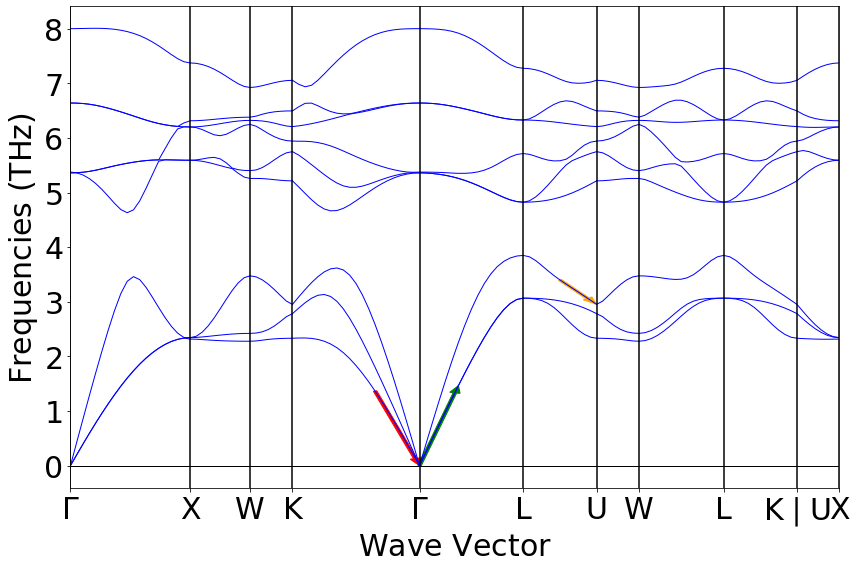

In [72]:
phonon_plot.get_plot()
#plot de la pente 1 en rouge
plt.arrow(distances[3][13],courbe1[13],distances[3][-1]-distances[3][13],courbe1[-1]-courbe1[13], color='red',width = 0.03,length_includes_head =True)
#plot de la pente 2 en vert
plt.arrow(distances[4][0],courbe2[0],distances[4][6]-distances[4][0],courbe2[6]-courbe2[0], color='green',width = 0.03,length_includes_head =True)
#plot de la pente 3 en orange
plt.arrow(distances[5][6],courbe3[6],distances[5][-1]-distances[5][6],courbe3[-1]-courbe3[6], color='orange',width = 0.03,length_includes_head =True)